# This is the ultimate scientific figure.

Or not.
Perhaps a practical scientific figure, with reminders relevant for my personal 
needs...


## TODO 
* set font
* many journals advise/require using a sans-serif font for figures, in particular
* Arial/Helvetica
* third axis
* align axes
* minor and major ticks
* scientific notation
* legend, alpha, box contour
* date time and rotation of axis



In [8]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [10]:
# some functions

def set_paper_style():
    # This sets reasonable defaults for font size for
    # a figure that will go in a paper
    sns.set_context("paper", font_scale=1, rc={"font":'sans', "font.size":10, 
                                 "axes.titlesize":10,"axes.labelsize":10,
                                 "xtick.labelsize":10, "ytick.labelsize":10,})   
    sns.set_style("ticks") 
    
# to rotate the ticks of a chosen axis. plt.xticks(rotation=90) works if you need
# to change only one axis

def rotate_ticks():
     for tick in ax.get_xticklabels():
         tick.set_rotation(90)  

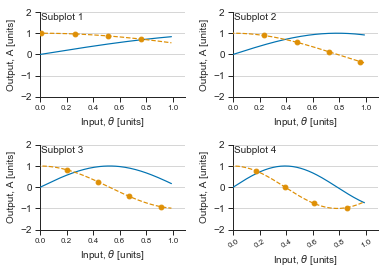

In [18]:
# use a nice plain style with ticks. For more styles, see:
# https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html 
#plt.style.available to see all available plots
plt.style.use('seaborn-ticks')

# make list of color tuples, to be used directly in plot
# it is nice to use seaborn combined with matplotlib. Seaborn alone is excellent
# for quickly making complex plots, although this requires a trade-off in flexibility,
# I've found the best approach is to use both.
colors = sns.color_palette("colorblind", 10)

# to quickly scale figures for different media: paper, notebook (default), poster, talk,
# use set_context: https://seaborn.pydata.org/generated/seaborn.set_context.html
#sns.set_context(context='poster', font_scale=1, rc=None)

# sea seaborn documentaiton on color palettes for more information
# https://seaborn.pydata.org/tutorial/color_palettes.html

# squeeze as false returns an array of axes, even if there is only one (nrows=ncols=1), which is good if you don't know how many
# axes you will need.
# sharex or sharey forces same axis limits and ticks for x or y axes.
# figure size is in inches
# I suggest using subplots, even when you intend on using only one subplot f, ax = subplots()
# this is also used here https://realpython.com/python-matplotlib-guide/
f, axarr = plt.subplots(nrows=2, ncols=2, figsize=(14/2.54, 10/2.54), squeeze=False, sharex=True, sharey=False)

set_paper_style()

# f.axes is a list of all the Axes objects (here 2*2=4 objects)
for i, ax in enumerate(f.axes):
    
    # values to plot
    x = np.arange(-1,1,0.01)
    y1 = np.sin((i+1)*x)
    y2 = np.cos((i+1)*x)
    
    # plot values to current axis
    l1 = ax.plot(x, y1, '-', label='sin', zorder=10, color=colors[0])
    
    # Int arguments, for example 5, puts a marker at every 5th point
    # Float arguments put markers at approximately equal distances along the line, at the nearest data point
    # Finally, a slice or list/array argument can specify specific marker locations.
    # this is good for differentiating lines, visible in black and white. 
    # However, it should be obvious that the data points are denser than the markers,
    # otherwise it looks like you're linking data points!
    l2 = ax.plot(x, y2, 'o', ls='--', label='cos', zorder=10, color=colors[1], markevery=0.2)
    
    # add text to inner top left of the axis. Often this is a good way to add a title 
    # to a subplot. zorder to put it behind the curve
    ax.text(0.15, 0.9, 'Subplot {}'.format(i+1), {'fontsize': 10},
             horizontalalignment='center', clip_on=False, transform=ax.transAxes, zorder=-1)
    
    # when setting axis limits, you can leave one blank, or =None
    ax.set_xlim(0,)
    ax.set_ylim(-2,2)
    
    # show grid, but only on the y axis
    ax.grid(axis='y')
    
    # set labels on x and y axis
    ax.set_ylabel('Output, A [units]')
    # double \\ is required for theta, otherwise \t is understood as TAB
    # equations go between $$. Syntax is similar to Latex
    ax.set_xlabel('Input, $\\theta$ [units]')

    # secondary axis on opposite side of graph opposite
    ax1 = ax.twinx()
    
# styling axes
for ax in f.axes:
    # Hide the right and top spines, otherwise the plot is within a box.
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    # adapted from reply of Mathieu at https://stackoverflow.com/questions/51553545/matplotlib-tick-labels-disappeared-after-set-sharex-in-subplotst 
    ax.tick_params(
    axis='x',           # changes apply to the x-axis
    which='both',       # both major and minor ticks are affected
    bottom=True,
    top=False,
    labelbottom=True,
    labelsize=8,
    )
    
    
# see https://stackoverflow.com/questions/5484922/secondary-axis-with-twinx-how-to-add-to-legend/23647410
# make list
lines = l1+l2+l3
labels = [line.get_label() for line in lines]

# Location can be upper and lower, middle, and left or right. Loc = o or 'best' gives best position, considering the lines. 
ax.legend(lines, labels, loc='lower right', ncol=len(l), facecolor='white', framealpha=0,
          bbox_to_anchor=(0, 1.2), edgecolor='w')  

# rotate the x axis ticks of the bottom right subplot. This is useful when tick labels are long (e.g. datetime)
f.axes[-1].tick_params(axis='x', rotation=30, labelright=True)

# if using datetime on the x-axis, then it can be better to use autofmt_xdate.
#f.autofmt_xdate(bottom=0.2, rotation=30, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
# save current figure as SVG (vectorial) makes it easy to make manual changes later, in Illustrator or Inkscape
plt.savefig('output_figure.svg')

# save current figure as PNG (bitmap) with given DPI: 300 is generally good for publication (see journal recommendations).
plt.savefig('output_figure.png', dpi=300)